In [1]:
'''
#create a conda environment
conda create --name infomedia_pycaret python=3.6
#activate environment
conda activate infomedia_pycaret
#install pycaret
pip install pycaret
#create notebook kernel connected with the conda environment
python -m ipykernel install --user --name infomedia_pycaret --display-name "infomedia-pycaret"
'''

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#from pandas.plotting import scatter_matrix
#from sklearn import preprocessing
#from sklearn.preprocessing import StandardScaler
#from sklearn.preprocessing import MinMaxScaler
#from sklearn.preprocessing import RobustScaler
#import statsmodels.api as sm

In [3]:
from pycaret.utils import version
from pycaret.classification import *
version()

'2.2.3'

In [4]:
df = pd.read_csv('dataset_expanded.csv', encoding='ansi')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   topic              185 non-null    object 
 1   doc_pred           185 non-null    float64
 2   bert_sentiment     185 non-null    float64
 3   lexicon_sentiment  185 non-null    float64
 4   topical            185 non-null    int64  
 5   tokens             185 non-null    int64  
 6   entities           185 non-null    int64  
 7   length             185 non-null    int64  
 8   text               185 non-null    object 
 9   text_eng           185 non-null    object 
 10  label              185 non-null    int64  
 11  y_textblob         185 non-null    float64
 12  y_vader            185 non-null    float64
dtypes: float64(5), int64(5), object(3)
memory usage: 18.9+ KB


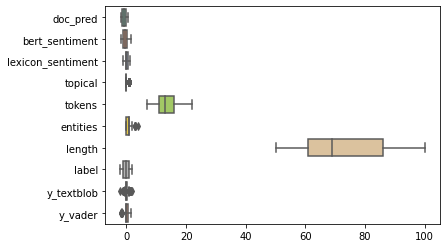

In [6]:
# Box-plot
ax = sns.boxplot(data=df, orient='h', palette='Set2')

In [7]:
# Corr matrix
corr_matrix = df.corr()
corr_matrix['label'].sort_values(ascending=False)

label                1.000000
lexicon_sentiment    0.668935
doc_pred             0.640863
bert_sentiment       0.505225
y_vader              0.421931
y_textblob           0.319807
tokens              -0.075446
topical             -0.090951
entities            -0.135668
length              -0.174726
Name: label, dtype: float64

In [8]:
exp_name = setup(data = df,
                 target = 'label',
                 numeric_features = ['tokens', 'entities'],
                 ignore_features = ['length', 'text', 'text_eng', 'y_textblob', 'y_vader', 'bert_sentiment'])

,Description,Value
0,session_id,7149
1,Target,label
2,Target Type,Multiclass
3,Label Encoded,"-1: 0, -2: 1, 0: 2, 1: 3, 2: 4"
4,Original Data,"(185, 13)"
5,Missing Values,False
6,Numeric Features,4
7,Categorical Features,2
8,Ordinal Features,False
9,High Cardinality Features,False


In [9]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8212,0.9569,0.8233,0.8429,0.8113,0.7756,0.7922,0.0520
dt,Decision Tree Classifier,0.7436,0.8423,0.7467,0.7734,0.7282,0.6800,0.7011,0.0080
xgboost,Extreme Gradient Boosting,0.7353,0.9285,0.7267,0.7509,0.7221,0.6686,0.6860,0.4360
lightgbm,Light Gradient Boosting Machine,0.7276,0.9186,0.7267,0.7536,0.7152,0.6605,0.6841,0.1090
catboost,CatBoost Classifier,0.6968,0.9154,0.6967,0.6921,0.6757,0.6208,0.6417,1.2850
et,Extra Trees Classifier,0.6814,0.9184,0.6733,0.6855,0.6587,0.6002,0.6157,0.1030
rf,Random Forest Classifier,0.6667,0.9088,0.6633,0.6757,0.6499,0.5812,0.5946,0.1020
lr,Logistic Regression,0.5192,0.8314,0.5167,0.5331,0.5065,0.3963,0.4063,0.4230
ridge,Ridge Classifier,0.5038,0.0000,0.5000,0.5167,0.4844,0.3785,0.3910,0.0070
lda,Linear Discriminant Analysis,0.4808,0.8122,0.4767,0.4632,0.4509,0.3488,0.3610,0.0070


In [10]:
gbc = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9231,0.9923,0.9333,0.9487,0.9231,0.9037,0.9104
1,0.6923,0.9629,0.6667,0.7077,0.6846,0.6090,0.6234
2,0.9231,0.9853,0.9333,0.9487,0.9231,0.9037,0.9104
3,0.8462,0.9336,0.8000,0.9077,0.8397,0.8030,0.8223
4,0.7692,0.9042,0.7667,0.7821,0.7692,0.7111,0.7164
5,0.8462,0.9147,0.8333,0.8654,0.8440,0.8060,0.8121
6,0.7692,1.0000,0.8000,0.6769,0.7033,0.7153,0.7665
7,0.7692,0.9483,0.7667,0.7500,0.7516,0.7090,0.7143
8,0.9231,0.9462,0.9333,0.9423,0.9209,0.9030,0.9098
9,0.7500,0.9815,0.8000,0.9000,0.7536,0.6923,0.7369


In [11]:
print(gbc)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=7149, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


In [12]:
evaluate_model(gbc)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [13]:
predict_model(gbc);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.9286,0.9861,0.9371,0.9345,0.9291,0.9106,0.9121


In [14]:
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8462,0.9045,0.8333,0.8462,0.8462,0.8060,0.8060
1,0.6923,0.8091,0.6667,0.6923,0.6923,0.6119,0.6119
2,0.9231,0.9545,0.9333,0.9487,0.9231,0.9037,0.9104
3,0.7692,0.8545,0.7333,0.8308,0.7679,0.7068,0.7234
4,0.6923,0.8091,0.6667,0.6923,0.6923,0.6119,0.6119
5,0.6923,0.8136,0.7000,0.8500,0.6883,0.6176,0.6570
6,0.5385,0.7182,0.5667,0.4846,0.4813,0.4307,0.4653
7,0.7692,0.8591,0.8000,0.6346,0.6850,0.7132,0.7525
8,0.8462,0.9000,0.8333,0.8654,0.8388,0.8045,0.8107
9,0.6667,0.8000,0.7333,0.8889,0.6667,0.5932,0.6623


In [15]:
print(dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=7149, splitter='best')


In [16]:
xgboost = create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8462,0.9706,0.8333,0.8462,0.8462,0.8060,0.8060
1,0.7692,0.9343,0.7333,0.7308,0.7473,0.7068,0.7122
2,0.9231,0.9853,0.9333,0.9487,0.9231,0.9037,0.9104
3,0.8462,0.8706,0.8000,0.9077,0.8397,0.8030,0.8223
4,0.5385,0.8909,0.5000,0.6154,0.5692,0.4222,0.4254
5,0.6923,0.9364,0.6333,0.6538,0.6667,0.6119,0.6311
6,0.6923,0.9790,0.7333,0.6256,0.6264,0.6232,0.6726
7,0.6923,0.9476,0.7000,0.6090,0.6440,0.6148,0.6289
8,0.7692,0.9084,0.7667,0.8077,0.7729,0.7068,0.7122
9,0.5833,0.8620,0.6333,0.7639,0.5861,0.4872,0.5393


In [17]:
print(xgboost)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1,
              objective='multi:softprob', random_state=7149, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='auto', use_label_encoder=True, validate_parameters=1,
              verbosity=0)
